In [ ]:
#prezentacja1

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
np.random.seed = 42

In [131]:
df = pd.read_csv('lung_cancer_prediction_dataset.csv')
df.head()

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


In [132]:
df.describe()

,ID,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
count,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000
mean,110315.500000,229.779882,52.518352,8.175274,7.007515,0.223526,63931.086928,1.502085,3.049802
std,63691.116633,349.247477,19.078215,12.377248,9.802187,1.231025,130690.126777,0.578043,14.924169
min,0.000000,54.000000,20.000000,0.000000,0.000000,0.000000,10005.000000,0.500000,0.000000
25%,55157.750000,83.000000,36.000000,0.000000,0.000000,0.000000,23000.000000,1.000000,0.000000
50%,110315.500000,113.000000,53.000000,0.000000,0.000000,0.000000,30000.000000,1.500000,0.000000
75%,165473.250000,206.000000,69.000000,15.000000,14.000000,0.000000,45000.000000,2.000000,0.000000
max,220631.000000,1400.000000,85.000000,40.000000,30.000000,10.000000,690000.000000,2.500000,90.000000


In [133]:
count = df[(df['Lung_Cancer_Diagnosis'] == 'Yes') & (df['Survival_Years'] == 0)].shape[0]
print(count)

0


In [134]:
df.columns

Index(['ID', 'Country', 'Population_Size', 'Age', 'Gender', 'Smoker',
       'Years_of_Smoking', 'Cigarettes_per_Day', 'Passive_Smoker',
       'Family_History', 'Lung_Cancer_Diagnosis', 'Cancer_Stage',
       'Survival_Years', 'Adenocarcinoma_Type', 'Air_Pollution_Exposure',
       'Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access',
       'Early_Detection', 'Treatment_Type', 'Developed_or_Developing',
       'Annual_Lung_Cancer_Deaths', 'Lung_Cancer_Prevalence_Rate',
       'Mortality_Rate'],
      dtype='object')

Ustaliliśmy, że naszym y będzie kolumna Survival_Years. Ze zbioru x usuwamy kolumny: ID, Country, Population_Size, Developed_or_Developing, Annual_Lung_Cancer_Deaths, Lung_Cancer_Prevalence_Rate, Mortality_Rate



Dodatkowo, musimy przefiltrować nasze rekordy do tych, które w kolumnie Lung_Cancer_Diagnosis mają wartośc 'Yes' (potem tą kolumne usuniemy też)





In [135]:
# Usunięcie niepotrzebnych kolumn
columns_to_drop = [
    "ID", "Country", "Population_Size", "Developed_or_Developing",
    "Annual_Lung_Cancer_Deaths", "Lung_Cancer_Prevalence_Rate", "Mortality_Rate"
]
df = df.drop(columns=columns_to_drop)

# Filtrowanie rekordów, gdzie Lung_Cancer_Diagnosis == 'Yes'
df = df[df["Lung_Cancer_Diagnosis"] == "Yes"]

# Usunięcie kolumny Lung_Cancer_Diagnosis
df = df.drop(columns=["Lung_Cancer_Diagnosis"])

# Sprawdzenie końcowego wyniku
df.head()

,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Cancer_Stage,Survival_Years,Adenocarcinoma_Type,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type
26,40,Female,Yes,11,17,No,No,Stage 1,9,No,Low,No,No,Poor,No,Chemotherapy
32,55,Male,Yes,9,8,No,Yes,Stage 1,10,No,Medium,Yes,No,Poor,No,Radiotherapy
33,33,Male,Yes,4,12,No,Yes,Stage 1,3,No,Medium,No,No,Poor,No,NaN
93,61,Male,Yes,14,28,No,No,Stage 1,10,No,Low,No,Yes,Good,Yes,Chemotherapy
106,70,Male,Yes,7,21,No,No,Stage 2,7,Yes,Medium,Yes,No,Poor,No,Radiotherapy


teraz należy zamienić klomne Survival_Years na "binarną" - czyli np na taką, która powie nam, czy dany rekord przeżył 3 lata. Żeby wyznaczyć tą wartość graniczną, wypadałoby sprawdzić, ile jakich wartości jest w tej kolumnie. Szukamy zatem wartości granicznej - średniej(lub mediana)

In [136]:
mean_survival = df["Survival_Years"].mean()
median_survival = df["Survival_Years"].median()

# Zamiana NaN w kolumnie Treatment_Type na "NotTreated"
df["Treatment_Type"] = df["Treatment_Type"].fillna("NotTreated")

print(f"Średnia: {mean_survival}")
print(f"Mediana: {median_survival}")

Średnia: 5.503515232674925
Mediana: 6.0


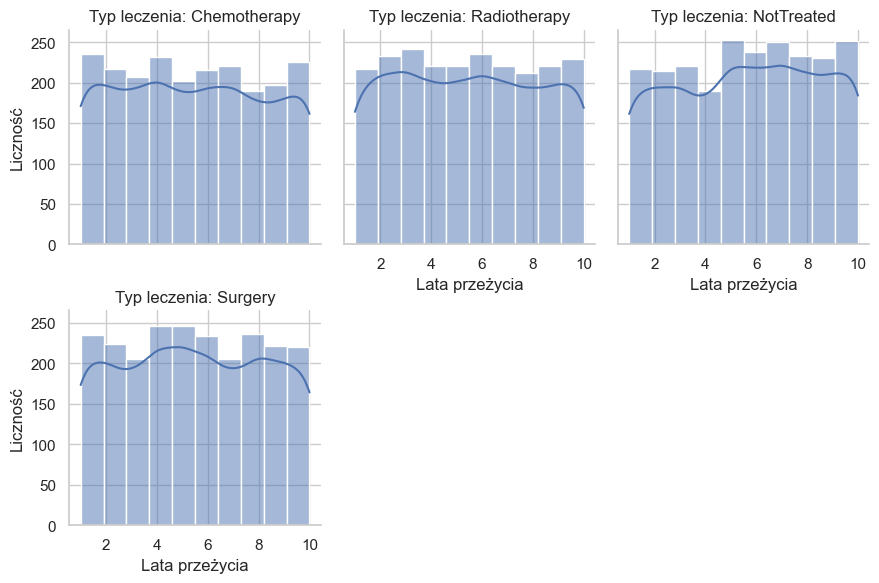

In [137]:
sns.set(style="whitegrid")

# Tworzenie histogramów
g = sns.FacetGrid(df, col="Treatment_Type", col_wrap=3, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="Survival_Years", bins=10, kde=True)

g.set_axis_labels("Lata przeżycia", "Liczność")
g.set_titles(col_template="Typ leczenia: {col_name}")
plt.show()

zatem, mowa kolmna będzie nam odpowiadała na pytanie, czy dany rekord przeżył więcej niz 5 lat.

In [138]:
df["Survived_More_Than_5"] = (df["Survival_Years"] >= 6).astype(int)

# Usunięcie starej kolumny
df = df.drop(columns=["Survival_Years"])

In [139]:
df.columns

Index(['Age', 'Gender', 'Smoker', 'Years_of_Smoking', 'Cigarettes_per_Day',
       'Passive_Smoker', 'Family_History', 'Cancer_Stage',
       'Adenocarcinoma_Type', 'Air_Pollution_Exposure',
       'Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access',
       'Early_Detection', 'Treatment_Type', 'Survived_More_Than_5'],
      dtype='object')

In [140]:
df = df.replace({"Yes": 1, "No": 0})
df["Cancer_Stage"] = df["Cancer_Stage"].str.replace("stage", "", case=False).astype(int)

In [141]:
df.describe()

,Age,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Cancer_Stage,Adenocarcinoma_Type,Occupational_Exposure,Indoor_Pollution,Early_Detection,Survived_More_Than_5
count,8961.000000,8961.000000,8961.000000,8961.000000,8961.000000,8961.000000,8961.000000,8961.000000,8961.000000,8961.000000,8961.000000,8961.000000
mean,52.664658,0.697355,14.237697,12.207789,0.305211,0.145296,2.532083,0.422051,0.308671,0.226649,0.283674,0.500502
std,19.176528,0.459428,13.429103,10.167334,0.460523,0.352419,1.127330,0.493914,0.461971,0.418687,0.450806,0.500028
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,1.000000,12.000000,12.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,69.000000,1.000000,26.000000,21.000000,1.000000,0.000000,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,85.000000,1.000000,40.000000,30.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


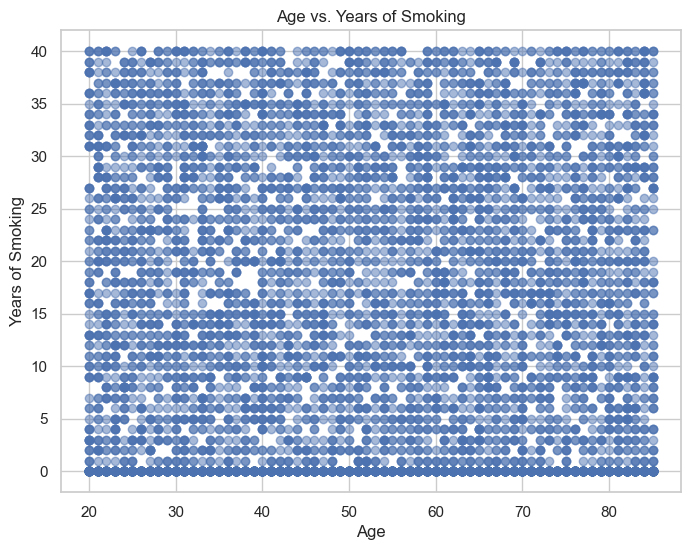

In [142]:
# Wykres scatter
plt.figure(figsize=(8, 6))
plt.scatter(df["Age"], df["Years_of_Smoking"], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Years of Smoking")
plt.title("Age vs. Years of Smoking")
plt.grid(True)
plt.show()

In [143]:
# Znalezienie wierszy, gdzie Years_of_Smoking > Age
invalid_rows = df[df["Years_of_Smoking"] > df["Age"]]

print(invalid_rows)
print(f"Liczba błędnych wierszy: {len(invalid_rows)}")

        Age  Gender  Smoker  Years_of_Smoking  Cigarettes_per_Day  \
1396     38    Male       1                39                  28   
4084     23    Male       1                34                  11   
4639     30    Male       1                38                  10   
5413     20    Male       1                31                  30   
5656     21    Male       1                29                  20   
...     ...     ...     ...               ...                 ...   
218310   29  Female       1                39                  26   
218599   31  Female       1                38                  28   
218637   29    Male       1                38                  29   
219845   20    Male       1                32                  22   
220520   25    Male       1                36                  26   

        Passive_Smoker  Family_History  Cancer_Stage  Adenocarcinoma_Type  \
1396                 0               0             1                    0   
4084             

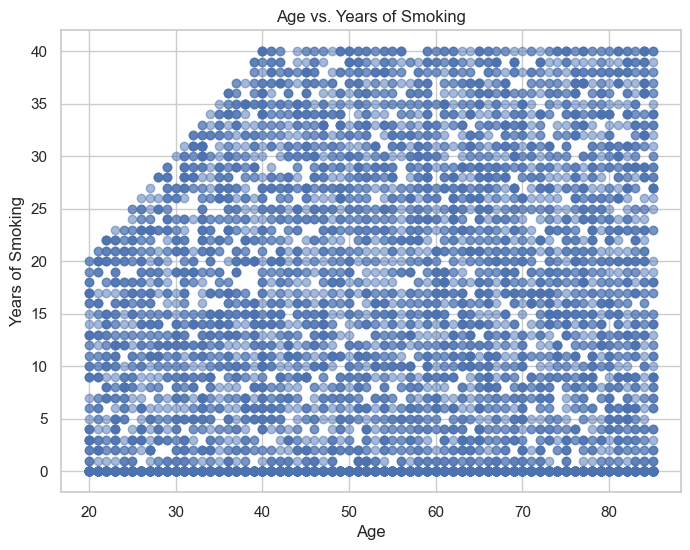

In [144]:
df = df[df["Age"] >= df["Years_of_Smoking"]]

# Poprawiony wykres scatter
plt.figure(figsize=(8, 6))
plt.scatter(df["Age"], df["Years_of_Smoking"], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Years of Smoking")
plt.title("Age vs. Years of Smoking")
plt.grid(True)
plt.show()

In [145]:
df = df.drop(columns=["Smoker"])

In [146]:
# Sprawdzenie rozmiaru przed usunięciem braków
print("Rozmiar przed usunięciem NaN:", df.shape)

Rozmiar przed usunięciem NaN: (8463, 15)


In [147]:
df

,Age,Gender,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Cancer_Stage,Adenocarcinoma_Type,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Survived_More_Than_5
26,40,Female,11,17,0,0,1,0,Low,0,0,Poor,0,Chemotherapy,1
32,55,Male,9,8,0,1,1,0,Medium,1,0,Poor,0,Radiotherapy,1
33,33,Male,4,12,0,1,1,0,Medium,0,0,Poor,0,NotTreated,0
93,61,Male,14,28,0,0,1,0,Low,0,1,Good,1,Chemotherapy,1
106,70,Male,7,21,0,0,2,1,Medium,1,0,Poor,0,Radiotherapy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220444,83,Male,0,0,1,0,4,0,High,0,0,Poor,0,Surgery,0
220452,39,Female,15,22,0,0,4,0,Low,0,0,Good,0,Radiotherapy,0
220461,73,Male,21,6,0,1,4,0,High,0,0,Poor,0,NotTreated,1
220524,20,Male,0,0,0,0,4,0,Medium,1,1,Poor,1,NotTreated,1


In [148]:
# Usunięcie wierszy z NaN/Null
df = df.dropna()

# Sprawdzenie rozmiaru po usunięciu braków
print("Rozmiar po usunięciu NaN:", df.shape)

Rozmiar po usunięciu NaN: (8463, 15)


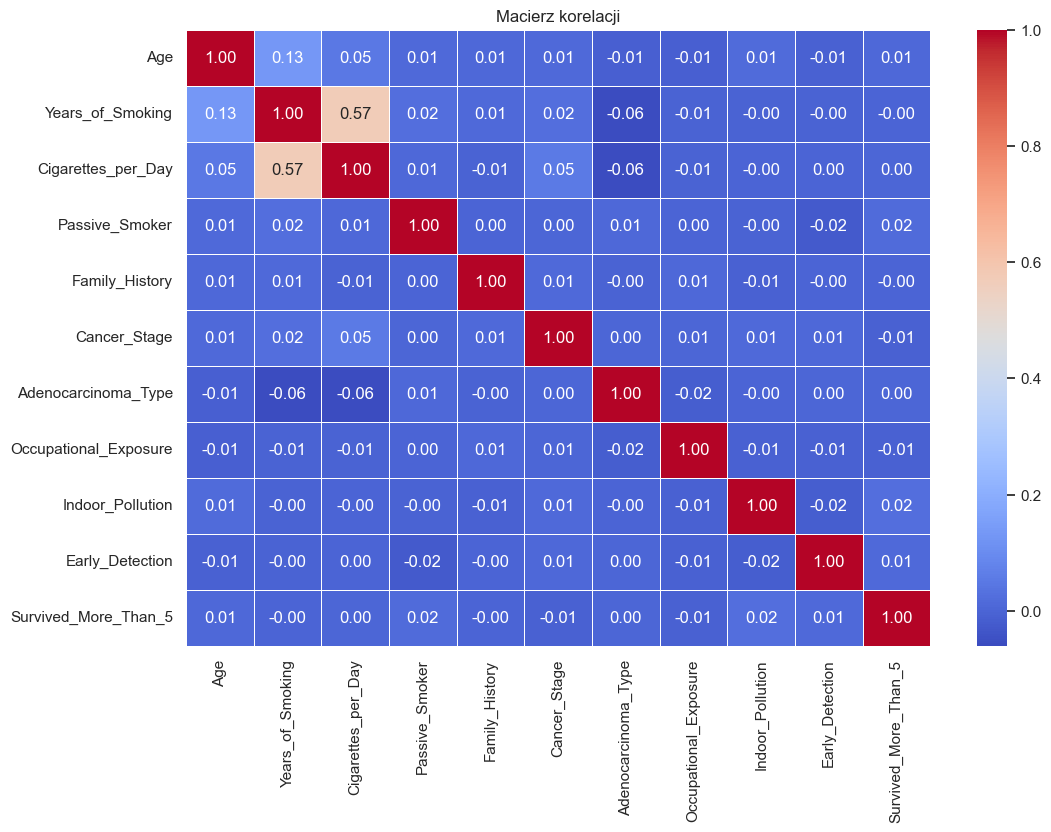

In [149]:
# Wybieramy tylko kolumny numeryczne
df_numeric = df.select_dtypes(include=["number"])

# Obliczamy macierz korelacji
correlation_matrix = df_numeric.corr()

# Rysujemy heatmapę
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Macierz korelacji")
plt.show()

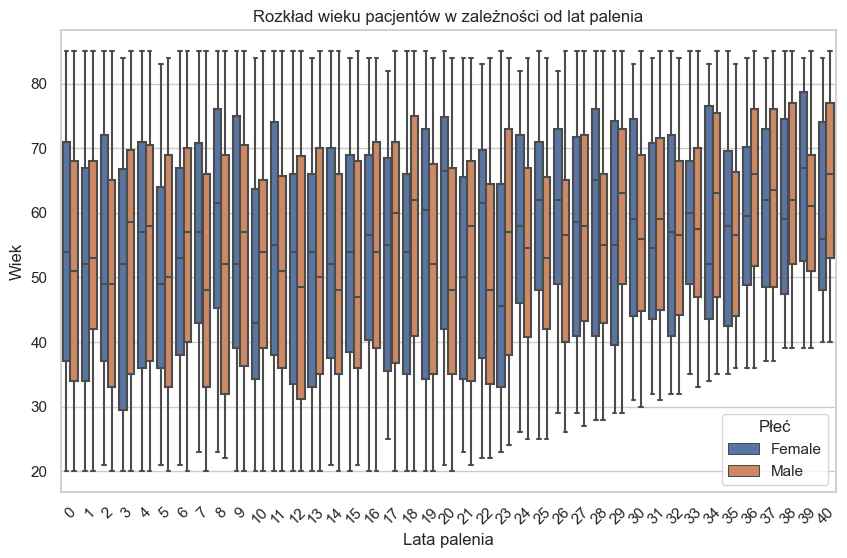

In [150]:
# Wykres pudełkowy: Wiek vs. Lata palenia
plt.figure(figsize=(10, 6))
sns.boxplot(x="Years_of_Smoking", y="Age", hue="Gender", data=df)
plt.title("Rozkład wieku pacjentów w zależności od lat palenia")
plt.xlabel("Lata palenia")
plt.ylabel("Wiek")
plt.xticks(rotation=45)
plt.legend(title="Płeć")
plt.show()

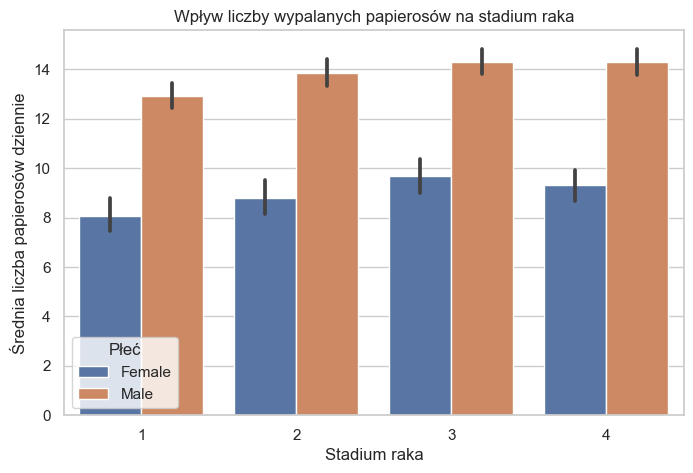

In [151]:
# Wykres słupkowy: Średnia liczba papierosów a stadium raka
plt.figure(figsize=(8, 5))
sns.barplot(x="Cancer_Stage", y="Cigarettes_per_Day", hue="Gender", data=df, estimator=lambda x: x.mean())
plt.title("Wpływ liczby wypalanych papierosów na stadium raka")
plt.xlabel("Stadium raka")
plt.ylabel("Średnia liczba papierosów dziennie")
plt.legend(title="Płeć")
plt.show()